##### Contents:
##### 1. Importing Visualization Libraries and Data
##### 2. Data Cleaning
##### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

#### 1. Importing Visualization Libraries and Data

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [53]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [55]:
# Define path
path = r'C:\Users\Daniella\ACH6'
#data set
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun violence clean.csv')) 

#### 2. Data Cleaning

In [21]:
df_gun.shape

(239677, 24)

In [67]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['longitude'] = pd.to_numeric(df_gun['longitude'], errors='coerce')

In [73]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['latitude'] = pd.to_numeric(df_gun['latitude'], errors='coerce')

In [77]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['congressional_district'] = pd.to_numeric(df_gun['congressional_district'], errors='coerce')

In [91]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['n_guns_involved'] = pd.to_numeric(df_gun['n_guns_involved'], errors='coerce')

In [61]:
# Changing Data Types:
df_gun[['date']] = df_gun[['date']].astype('datetime64[ns]')

# Change these columns to 'category' data type
columns_to_category = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'participant_age_group', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']

df_gun[columns_to_category] = df_gun[columns_to_category].astype('category')


In [81]:
df_gun = df_gun.drop(columns=["Unnamed: 0"])

In [83]:
df_gun = df_gun.drop(columns=["state_house_district"])

In [85]:
df_gun = df_gun.drop(columns=["state_senate_district"])

In [101]:
# Replace missing values with the mean 
df_gun['latitude'] = df_gun['latitude'].fillna(df_gun['latitude'].mean())
df_gun['longitude'] = df_gun['longitude'].fillna(df_gun['longitude'].mean())

In [111]:
# Replace missing values with the median:
df_gun['n_guns_involved'] = df_gun['n_guns_involved'].fillna(df_gun['n_guns_involved'].median())

In [119]:
# Replace missing values with the mode:
df_gun['congressional_district'] = df_gun['congressional_district'].fillna(df_gun['congressional_district'].mode()[0])

In [121]:
# Checking for missing values:
missing_values = df_gun.isnull().sum()
print(missing_values)

incident_id                 0
date                        0
state                       0
city_or_county              0
address                     0
n_killed                    0
n_injured                   0
congressional_district      0
gun_stolen                  0
gun_type                    0
incident_characteristics    0
latitude                    0
location_description        0
longitude                   0
n_guns_involved             0
participant_age             0
participant_age_group       0
participant_gender          0
participant_relationship    0
participant_status          0
participant_type            0
dtype: int64


In [123]:
df_gun.dtypes

incident_id                          int64
date                        datetime64[ns]
state                             category
city_or_county                    category
address                             object
n_killed                             int64
n_injured                            int64
congressional_district             float64
gun_stolen                        category
gun_type                          category
incident_characteristics          category
latitude                           float64
location_description              category
longitude                          float64
n_guns_involved                    float64
participant_age                     object
participant_age_group             category
participant_gender                category
participant_relationship          category
participant_status                category
participant_type                  category
dtype: object

In [377]:
df_gun.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,latitude_bin,longitude_bin,combined_bins,location combined,location combined
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4.0,3.0,4.0_3.0,0,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,1.0,2.0_1.0,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4.0,3.0,4.0_3.0,0,0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,2.0,3.0_2.0,2,2
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,3.0,3.0_3.0,3,3


#### Task 6.2

#### Correlations

In [195]:
# Select numerical columns
df_numeric = df_gun.select_dtypes(include=['float64', 'int64']).columns

In [387]:
# Create bins for latitude and longitude 
df_gun['latitude_bin'] = pd.cut(df_gun['latitude'], bins=10, labels=False)
df_gun['longitude_bin'] = pd.cut(df_gun['longitude'], bins=10, labels=False)

In [389]:
# Create a combined location feature so longitude and latitude can be put together
df_gun['combined_bins'] = df_gun['latitude_bin'].astype(str) + '_' + df_gun['longitude_bin'].astype(str)

In [341]:
# Create a map for combined_bins
bins_mapping = {location: idx for idx, location in enumerate(df_gun['combined_bins'].unique())}

In [393]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['combined_bins'] = pd.to_numeric(df_gun['combined_bins'], errors='coerce')

In [395]:
# Map combined with numerical values
df_gun['combined_bins_numbers'] = df_gun['combined_bins'].map(bins_mapping)

In [399]:
# Rename column:
df_gun.rename(columns = {'combined_bins_numbers' : 'location combined'}, inplace = True)

In [197]:
# Select numerical columns excluding 'latitude', 'longitude', 'latitude_bin', and 'longitude_bin'
selected_columns = df_numeric.difference(['latitude', 'longitude', 'latitude_bin', 'longitude_bin'])

In [199]:
selected_columns_2= ['longitude','latitude', 'latitude_bin', 'longitude_bin', 'combined_bins', 'location combined']

In [351]:
selected_columns = selected_columns.union(['location combined'])

In [405]:
df_gun = df_gun.loc[:, ~df_gun.columns.duplicated()]

In [407]:
df_gun.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,latitude_bin,longitude_bin,combined_bins,location combined
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,Unknown,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4.0,3.0,NaN,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,Unknown,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,1.0,NaN,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4.0,3.0,NaN,0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,Unknown,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,2.0,NaN,2
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,3.0,NaN,3


#### 2. Variables chosen fro the exploratory visual analysis. 

In [415]:
selected_columns = ['n_guns_involved', 'n_injured', 'n_killed', 'location combined']  

In [417]:
# Create a correlation matrix
correlation_matrix = df_gun[selected_columns].corr()

In [201]:
df_gun[selected_columns].corr()

,congressional_district,incident_id,n_guns_involved,n_injured,n_killed
congressional_district,1.000000,-0.044972,0.014972,-0.005835,0.044949
incident_id,-0.044972,1.000000,0.017393,0.009060,0.005052
n_guns_involved,0.014972,0.017393,1.000000,-0.032716,-0.022235
n_injured,-0.005835,0.009060,-0.032716,1.000000,-0.125425
n_killed,0.044949,0.005052,-0.022235,-0.125425,1.000000


#### 3. Create correlation matrix heatmap

#### Matplotlib

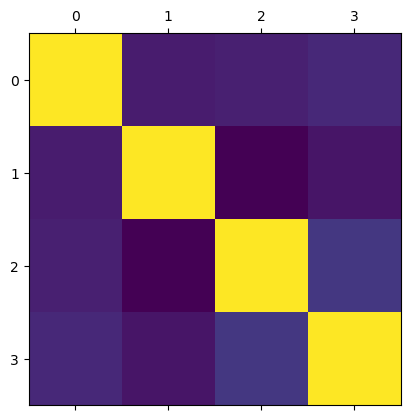

In [511]:
# Correlation heatmap:
plt.matshow(df_gun[selected_columns].corr())
plt.show()

In [425]:
# Export heatmap:
plt.matshow(df_gun[df_numeric].corr())
plt.savefig("correlation_heatmap_mat.png") 

In [545]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Daniella\\ACH6'

In [553]:
# Clear the figure
plt.clf()

In [555]:
# Add labels, a legend to the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_gun[selected_columns].corr(), fignum=f.number) # type of plot
plt.xticks(range(df_gun[selected_columns].shape[1]), df_gun[selected_columns].columns, fontsize=14, rotation=90) # X axis 
plt.yticks(range(df_gun[selected_columns].shape[1]), df_gun[selected_columns].columns, fontsize=14) # Y axis 
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) 

Text(0.5, 1.0, 'Correlation Matrix')

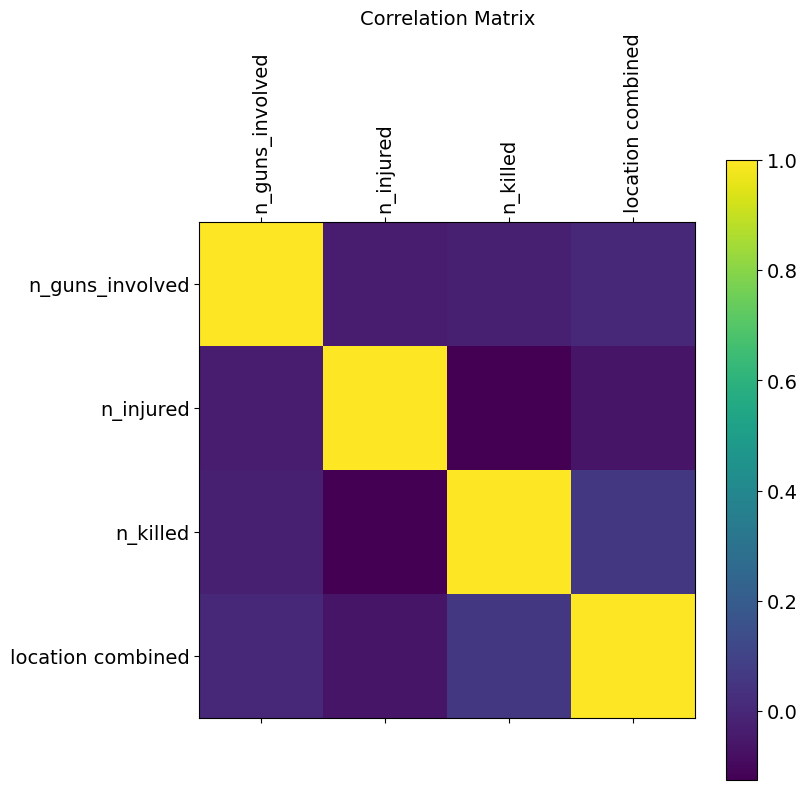

In [541]:
plt.show()

In [557]:
# Export heatmap:
plt.savefig("correlation_heatmap_mat_legends.png", bbox_inches='tight')  # save it with legend 

In [626]:
# Clear the figure
plt.clf()

##### Answer: The numbers in the plot show that there's not s strong connection between the variables. The relationships between these factors are  weak, so there’s not much of a pattern in the data.

#### Seaborn

In [208]:
# Clear the figure
plt.clf()

<Figure size 640x480 with 0 Axes>

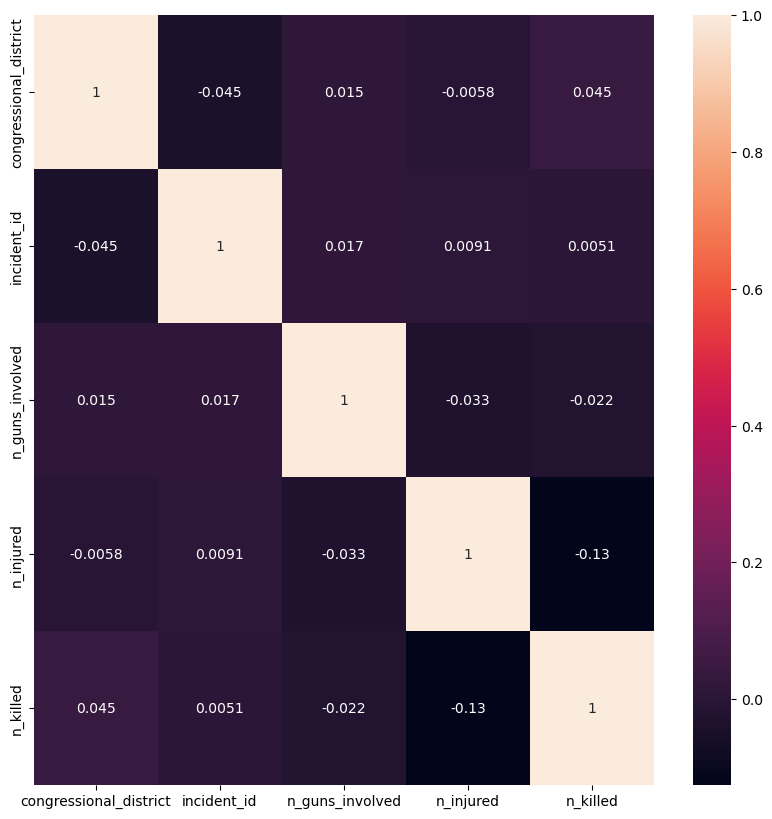

In [214]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix.
corr = sns.heatmap(df_gun[selected_columns].corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
# Save the plot as a PNG image (or any other format you prefer)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

#### 4. Create scatterplot for the variables with the strongest correlation


In [630]:
# Scatterplot for "number killed" and "location combined" 
sns.scatterplot(x='location combined', y='n_killed', data=df_gun)

<Axes: xlabel='location combined', ylabel='n_killed'>

In [634]:
# Export scatterplot:
plt.savefig("scatterplot_nº_killed_location.png", bbox_inches='tight')

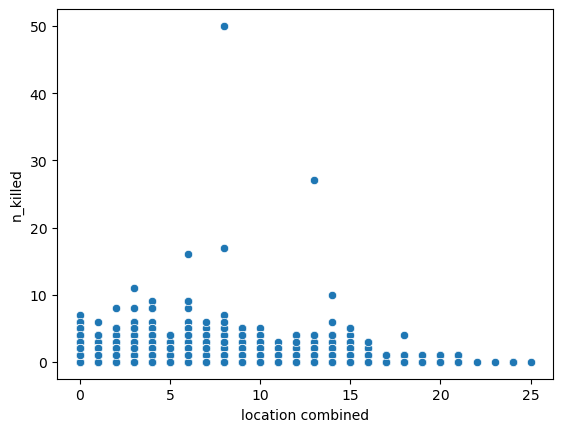

In [632]:
plt.show()

In [644]:
# Clear the figure
plt.clf()

In [646]:
# Scatterplot for "n_injured" and "location combined" 
sns.scatterplot(x='location combined', y='n_injured', data=df_gun)

<Axes: xlabel='location combined', ylabel='n_injured'>

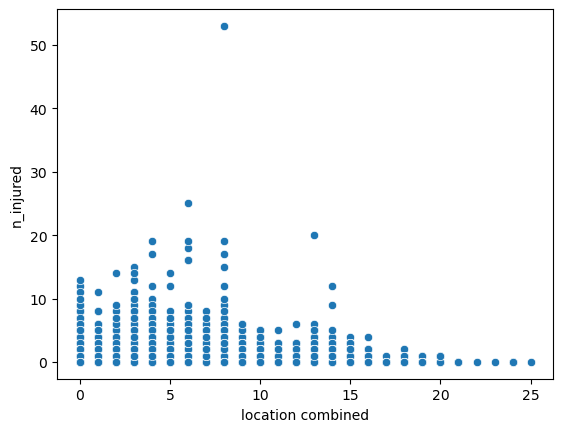

In [648]:
plt.show()

In [650]:
# Export scatterplot:
plt.savefig("scatterplot_nº_injured_location.png", bbox_inches='tight')

In [652]:
# Clear the figure
plt.clf()

In [654]:
# Scatterplot for "n_injured" and "location combined" 
sns.scatterplot(x='location combined', y='n_guns_involved', data=df_gun)

<Axes: xlabel='location combined', ylabel='n_guns_involved'>

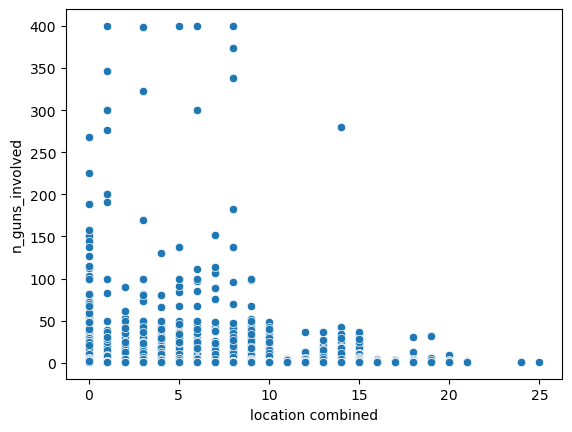

In [656]:
plt.show()

In [658]:
# Export scatterplot:
plt.savefig("scatterplot_n_guns_involved_location.png", bbox_inches='tight')

##### Answer: Lower-numbered locations seem to have more serious incidents (more guns, injuries, and deaths). Higher-numbered spots are generally safer, but there are some unusual cases where big incidents happen unexpectedly.

#### 5. Create a pair plot of the entire data set. 

In [715]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               239677 non-null  int64         
 1   date                      239677 non-null  datetime64[ns]
 2   state                     239677 non-null  category      
 3   city_or_county            239677 non-null  category      
 4   address                   239677 non-null  object        
 5   n_killed                  239677 non-null  int64         
 6   n_injured                 239677 non-null  int64         
 7   congressional_district    227733 non-null  float64       
 8   gun_stolen                239677 non-null  category      
 9   gun_type                  239677 non-null  category      
 10  incident_characteristics  239677 non-null  category      
 11  latitude                  231754 non-null  float64       
 12  lo

In [675]:
df_gun[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   n_guns_involved    140226 non-null  float64
 1   n_injured          239677 non-null  int64  
 2   n_killed           239677 non-null  int64  
 3   location combined  239677 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 7.3 MB


In [749]:
# Clear the figure
plt.clf()

In [709]:
selected_columns = ['n_guns_involved', 'n_injured', 'n_killed', 'location combined']

In [711]:
selected_df = df_gun[selected_columns]

In [760]:
pair_plot= sns.pairplot(selected_df)

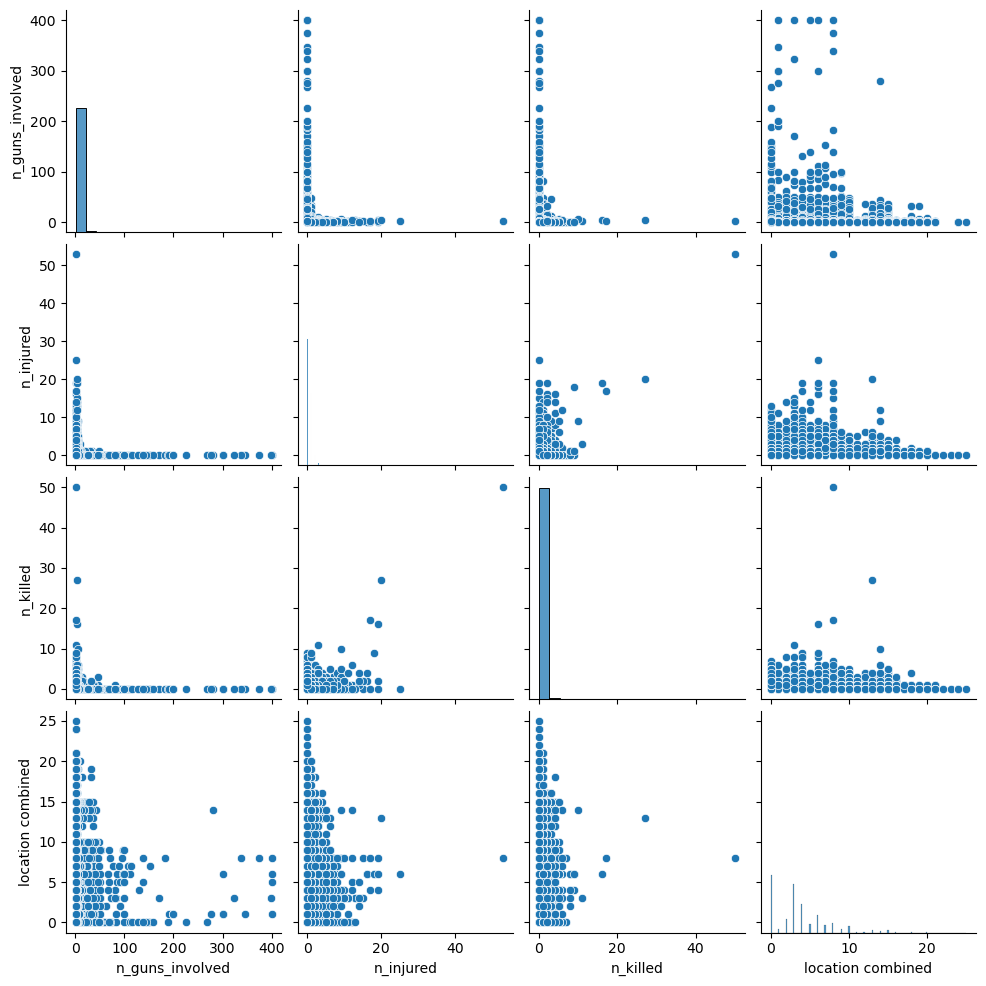

In [762]:
plt.show()

In [764]:
pair_plot.savefig("pairplot_selected_columns.png", bbox_inches='tight')

#### 6. Create a categorical plot and interpret the results.

In [143]:
# Get the minimum and maximum values for each column
min_injured = df_gun['n_injured'].min()
max_injured = df_gun['n_injured'].max()

min_killed = df_gun['n_killed'].min()
max_killed = df_gun['n_killed'].max()

min_guns_used = df_gun['n_guns_involved'].min()
max_guns_used = df_gun['n_guns_involved'].max()

# Print out the ranges
print(f"n_injured: Min = {min_injured}, Max = {max_injured}")
print(f"n_killed: Min = {min_killed}, Max = {max_killed}")
print(f"n_guns_involved: Min = {min_guns_used}, Max = {max_guns_used}")

n_injured: Min = 0, Max = 53
n_killed: Min = 0, Max = 50
n_guns_involved: Min = 1.0, Max = 400.0


In [146]:
# Define bin edges for each variable
injured_bins = [0, 5, 10, 20, 30, 40, 53]  # Ranges for n_injured
killed_bins = [0, 1, 2, 5, 10, 20, 30, 50]   # Ranges for n_killed
guns_involved_bins = [1, 10, 50, 100, 150, 200, 300, 400]  # Ranges for n_guns_involved

In [152]:
# Create labels for these bins (note that the number of labels should be one less than the number of bin edges)
injured_labels = ['0', '1-5', '6-10', '11-20', '21-30', '31-40', '41-53']
killed_labels = ['0', '1', '2-5', '6-10', '11-20', '21-30', '31-50']
guns_involved_labels = ['1-10', '11-50', '51-100', '101-150', '151-200', '201-300', '301-400']

In [158]:
# n_guns_involved bins should start from 1
df_gun['guns_category'] = pd.cut(df_gun['n_guns_involved'], bins=[0, 3, 10, 50, 100, 200, 400], 
                                 labels=["1-3 guns", "4-10 guns", "11-50 guns", "51-100 guns", "101-200 guns", "201+ guns"])

In [160]:
# n_injured bins starting from 0
df_gun['injured_category'] = pd.cut(df_gun['n_injured'], bins=[0, 5, 10, 20, 40, 53], 
                                    labels=["1-5", "6-10", "11-20", "21-40", "41-53"])

In [162]:
# n_killed bins starting from 0
df_gun['killed_category'] = pd.cut(df_gun['n_killed'], bins=[0, 1, 5, 10, 20, 30, 50], 
                                   labels=["1", "2-5", "6-10", "11-20", "21-30", "31-50"])

In [164]:
# Create categories for the columns with adjusted bin ranges
df_gun['guns_category'] = pd.cut(df_gun['n_guns_involved'], bins=[0, 3, 10, 50, 100, 200, 400], 
                                 labels=["1-3 guns", "4-10 guns", "11-50 guns", "51-100 guns", "101-200 guns", "201+ guns"])

df_gun['injured_category'] = pd.cut(df_gun['n_injured'], bins=[0, 5, 10, 20, 40, 53], 
                                    labels=["1-5", "6-10", "11-20", "21-40", "41-53"])

df_gun['killed_category'] = pd.cut(df_gun['n_killed'], bins=[0, 1, 5, 10, 20, 30, 50], 
                                   labels=["1", "2-5", "6-10", "11-20", "21-30", "31-50"])

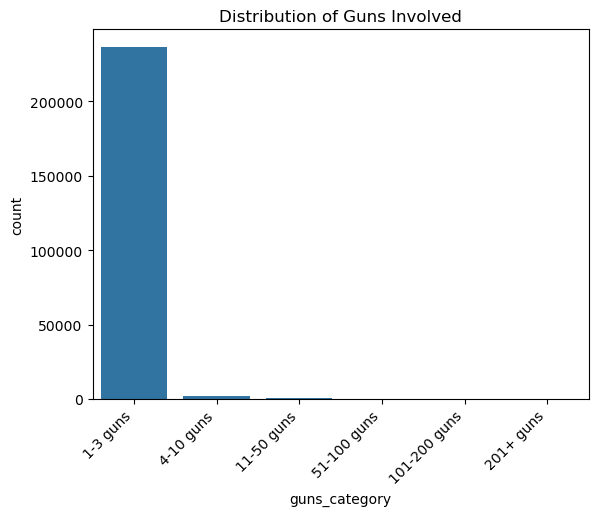

In [182]:
# Plot 1: Distribution of guns_category
sns.countplot(data=df_gun, x='guns_category')
plt.title('Distribution of Guns Involved')
plt.xticks(rotation=45, ha='right')
plt.show()

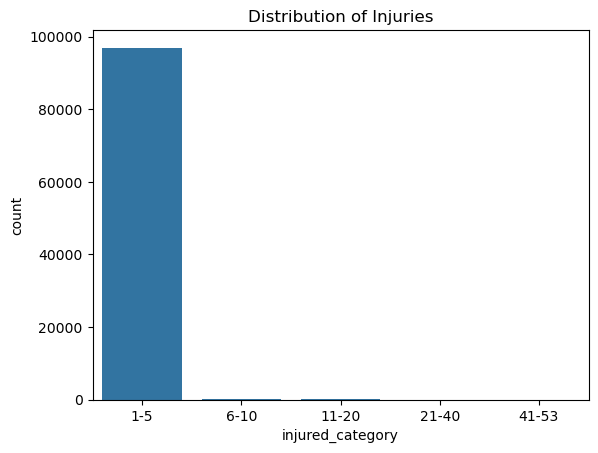

In [168]:
# Plot 2: Distribution of injured_category
sns.countplot(data=df_gun, x='injured_category')
plt.title('Distribution of Injuries')
plt.show()

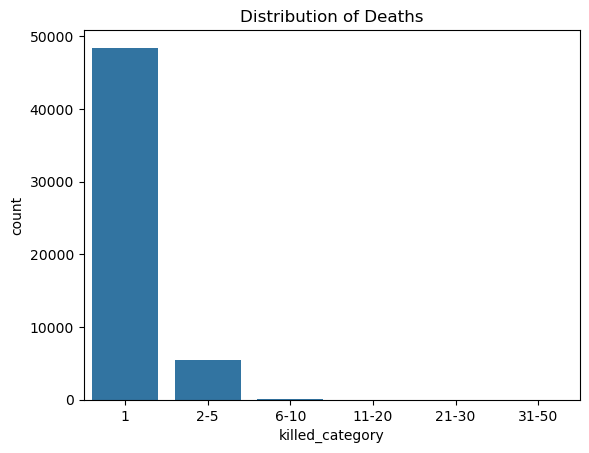

In [170]:
# Plot 3: Distribution of killed_category
sns.countplot(data=df_gun, x='killed_category')
plt.title('Distribution of Deaths')
plt.show()

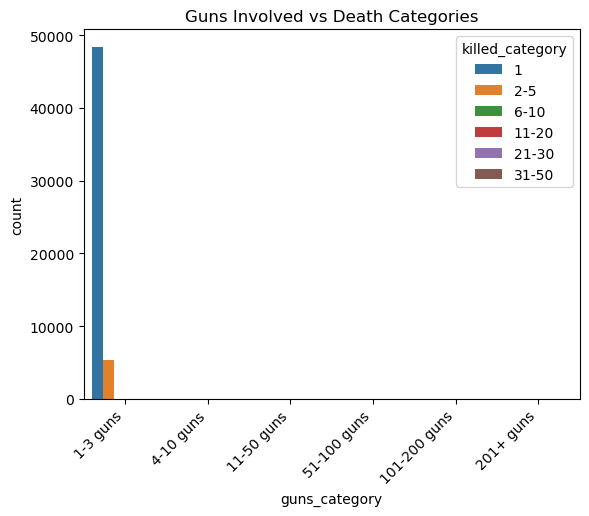

In [184]:
sns.countplot(data=df_gun, x='guns_category', hue='killed_category')
plt.title('Guns Involved vs Death Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

In [174]:
# Check the results
print(df_gun[['n_guns_involved', 'guns_category']].head())
print(df_gun[['n_injured', 'injured_category']].head())
print(df_gun[['n_killed', 'killed_category']].head())

   n_guns_involved guns_category
0              1.0      1-3 guns
1              1.0      1-3 guns
2              2.0      1-3 guns
3              1.0      1-3 guns
4              2.0      1-3 guns
   n_injured injured_category
0          4              1-5
1          3              1-5
2          3              1-5
3          0              NaN
4          2              1-5
   n_killed killed_category
0         0             NaN
1         1               1
2         1               1
3         4             2-5
4         2             2-5


#### 8. Hypotheses
Hypothesis 1: Incidents with fewer guns (1-3 guns) cause fewer injuries.

Hypothesis 2: Incidents with fewer guns (1-3 guns) result in fewer deaths.

Hypothesis 3: Missing injury or death data happens in incidents with fewer injuries or deaths. (When there are no injuries or deaths in an incident, the data might be missing because it's not considered important to record.